# Setup

In [1]:
import numpy as np
import pandas as pd
from algorithm.lingam import MLCLiNGAM
from utils.data_processing import show_nx_graph

# Test Example

## 1. Introduction: Diagram of Ground-Truth and Algorithm Process

The **causal graph of simulated dataset** is shown as follow.

We illustrate that MLCLiNGAM works through a **3-stage hybrid learning method** and the estimated causal graph shown in **cell 4.2** supports the theoretical illustration.

For latent confounder detection, MLCLiNGAM shows that there exist **a least one** latent confounder $u$ affects $\{x_0, x_1, x_3\}$ and the same as $\{x_1, x_2, x_3\}$ with the help of **maximal cliques detection**.

![image](image/mlc_lingam_example.png)

## 2. Data Simulation

###  2.1 Data without Latent Confounder

In [2]:
size = 1000
np.random.seed(42)

x0 = np.random.uniform(size=size)
x1 = 0.5 * x0 + np.random.uniform(size=size)
x2 = 0.5 * x1 + np.random.uniform(size=size)
x3 = 0.5 * x2 + np.random.uniform(size=size)
X = np.array([x0, x1, x2, x3]).T

### 2.2 Data with Latent Confounder

Here, we simulate a simple ground truth which presented in ParceLiNGAM(T Tashiro, S Shimizu, A Hyvärinen, 2014).

We show that **once exogenous variables or leaf variables are affected by latent confounders**, traditional algorithm fails to identify corresponding variables and thus is forced to perform a massive search.


Result given by MLCLiNGAM for the simulate dataset is shown in the cell 4.

In [2]:
size = 5000
np.random.seed(1000)
u1 = np.random.uniform(size=size)

In [3]:
np.random.seed(42)

x0 = np.random.uniform(size=size)
x0 += 1.25 * u1
x1 = 0.5 * x0 + np.random.uniform(size=size)
x1 += 1.25 * u1
x2 = 0.5 * x1 + np.random.uniform(size=size)
x3 = 0.5 * x2 + np.random.uniform(size=size)
x3 += 0.75 * u1
X_mlc = np.array([x0, x1, x2, x3]).T
![image](image/test.png)

## 3. Perform MLCLiNGAM

### 3.1 Fit MLCLiNGAM for Data 2.1

In [3]:
mlc_lingam_1 = MLCLiNGAM()
mlc_lingam_1.fit(X)

### 3.2 Fit MLCLiNGAM for Data 2.2

we emphasis that in order to show the statistical correctness, it is necessary to training MLCLiNGAM model with samples of large amount.

**5000 sample size** is require to training and it may takes a while for simulated data with latent confounder, nonetheless, it is quiet faster and more accurate than ParceLiNGAM(T Tashiro, S Shimizu, A Hyvärinen, 2014) in the same case.

In [4]:
mlc_lingam_2 = MLCLiNGAM()
mlc_lingam_2.fit(X_mlc)

In [16]:
print("Computational Time of MLCLiNGAM")
print("-------------------------------")
print("Stage-1(PC):                        ", round(mlc_lingam_2._stage1_time, 3))
print("Stage-2(up-bottom and bottom-up):   ", round(mlc_lingam_2._stage2_time, 3))
print("Stage-3(learning in maximal cliques)", round(mlc_lingam_2._stage3_time, 3))

Computational Time of MLCLiNGAM
-------------------------------
Stage-1(PC):                         0.022
Stage-2(up-bottom and bottom-up):    160.145
Stage-3(learning in maximal cliques) 286.197


## 4. Show Result

### 4.1 Result for Data 2.1 (without latent confounder)

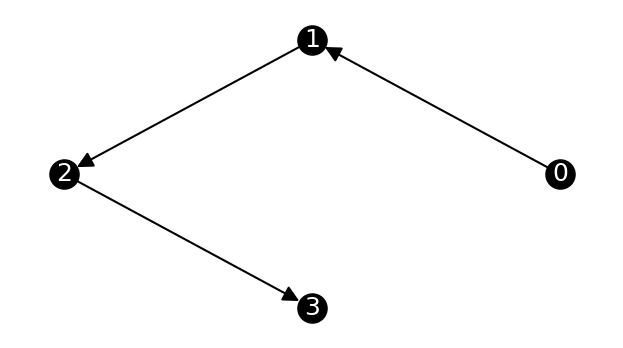

In [4]:
show_nx_graph(mlc_lingam_1.adjacency_matrix_, direct=True)

### 4.2 Result for Data 2.2 (with latent confounder)

Skeleton learned from stage1 (stable-PC).

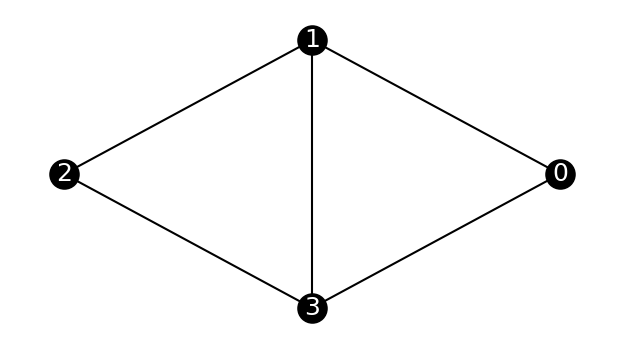

In [7]:
show_nx_graph(mlc_lingam_2.skeleton_, direct=False)

Final result learning by MLCLiNGAM.

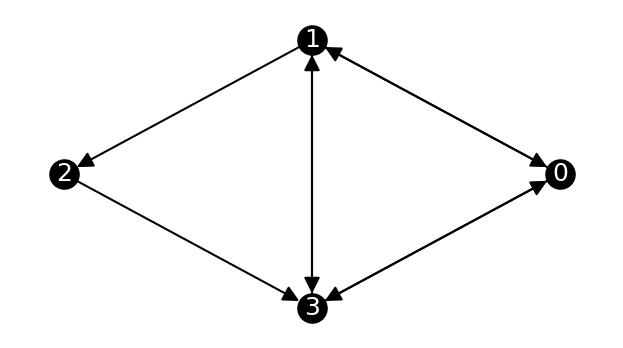

In [5]:
show_nx_graph(mlc_lingam_2.adjacency_matrix_, direct=True)

Latent confounder detection.

In [6]:
mlc_lingam_2.cliques_

[[1, 3, 0], [1, 3, 2]]

In [8]:
mlc_lingam_2.parents_set_

{0: set(), 1: set(), 2: {1}, 3: {2}}

## 5. Parameter for Algorithm Test 

In [ ]:
skeleton = np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 0, 1],
    [1, 1, 1, 0],
])
adjacency_matrix = np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 0, 1],
    [1, 1, 1, 0],
])

parents_set = {}
for i in range(4):
    parents_set[i] = set()
parents_set